In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from astropy.modeling.polynomial import Legendre2D, Polynomial2D
from astropy.wcs import Sip
from astropy.modeling.projections import Pix2Sky_ZEA, Sky2Pix_ZEA, AffineTransformation2D, Sky2Pix_AZP

In [49]:
blah = np.arange(-100,100,1)
x,y = np.meshgrid(blah, blah)
r = (x**2 + y**2)**.5
theta = np.arctan2(y,x)

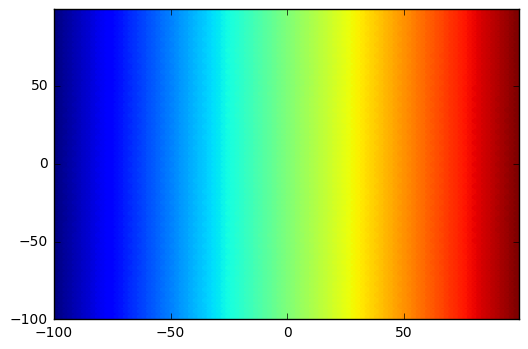

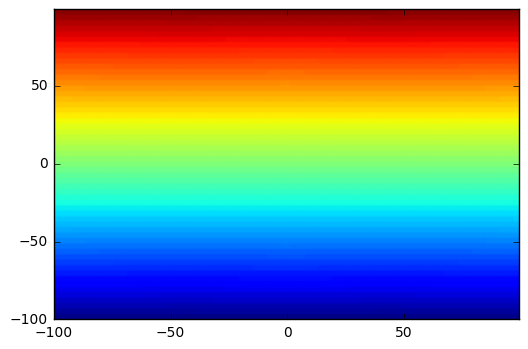

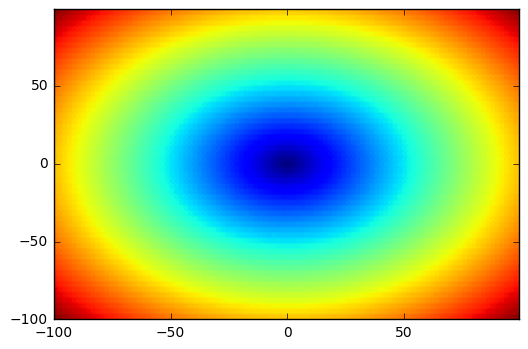

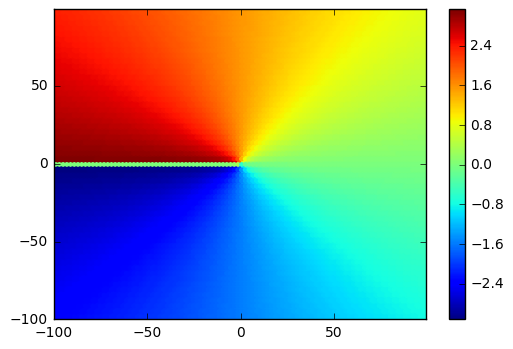

In [53]:
plt.hexbin(x.ravel(),y.ravel(), C=x.ravel())
plt.figure()
plt.hexbin(x.ravel(),y.ravel(), C=y.ravel())
plt.figure()
plt.hexbin(x.ravel(),y.ravel(), C=r.ravel())
plt.figure()
plt.hexbin(x.ravel(),y.ravel(), C=theta.ravel())
plt.colorbar()


array([[-2.35619449, -2.35116941, -2.34609382, ..., -0.80062541,
        -0.79549883, -0.79042325],
       [-2.36121957, -2.35619449, -2.35111839, ..., -0.79560189,
        -0.79047426, -0.78539816],
       [-2.36629516, -2.36127059, -2.35619449, ..., -0.79052632,
        -0.78539816, -0.78032206],
       ..., 
       [ 2.37142174,  2.36639822,  2.36132265, ...,  0.78539816,
         0.78027   ,  0.77519444],
       [ 2.36629516,  2.36127059,  2.35619449, ...,  0.79052632,
         0.78539816,  0.78032206],
       [ 2.36121957,  2.35619449,  2.35111839, ...,  0.79560189,
         0.79047426,  0.78539816]])

In [68]:
xoff = Legendre2D(1,1)

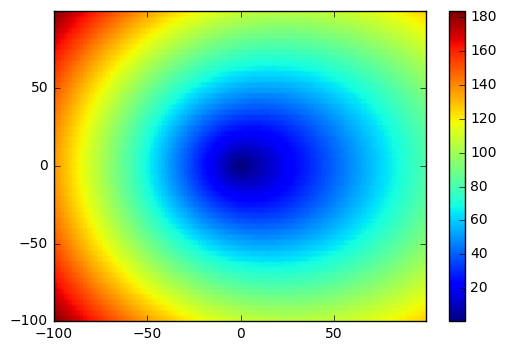

In [72]:
xoff.parameters = np.random.randn(xoff.parameters.size)
plt.hexbin(x.ravel(),y.ravel(), C=xoff(r,np.cos(theta)).ravel())
plt.colorbar()

In [66]:
xoff.parameters

array([-0.66211056, -0.70230243, -0.03145206,  0.1874232 ])

In [37]:
xoff(x,y).min()

-18801.130077746402

In [74]:
xoff = Polynomial2D(degree=5)

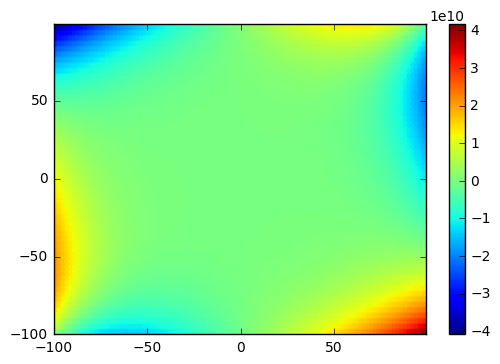

In [75]:
xoff.parameters = np.random.randn(xoff.parameters.size)
plt.hexbin(x.ravel(),y.ravel(), C=xoff(x,y).ravel())
plt.colorbar()

In [94]:
a_order = 3
b_order = 3
a = np.random.rand((a_order+1)**2).reshape((a_order+1,a_order+1))
ap = np.random.rand((a_order+1)**2).reshape((a_order+1,a_order+1))
b = np.random.rand((b_order+1)**2).reshape((b_order+1,b_order+1))
bp = np.random.rand((b_order+1)**2).reshape((b_order+1,b_order+1))
sip = Sip(a,b,ap,bp, [0.,0.])

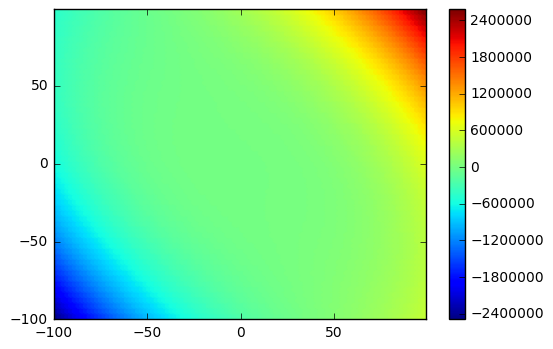

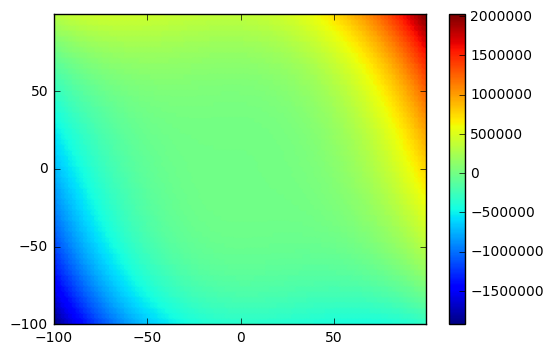

In [95]:
newxy = sip.foc2pix(np.vstack((x.ravel(),y.ravel())).T, 0)
plt.hexbin(x.ravel(), y.ravel(), C=newxy[:,0])
plt.colorbar()
plt.figure()
plt.hexbin(x.ravel(), y.ravel(), C=newxy[:,1])
plt.colorbar()

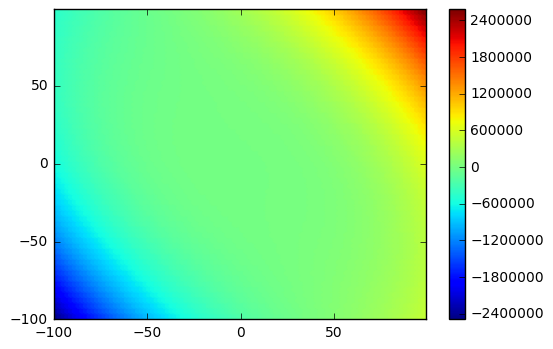

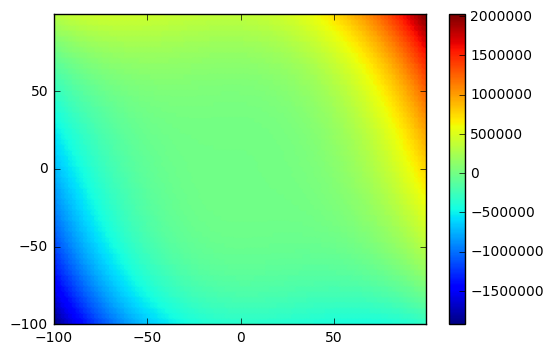

In [102]:
sip = Sip(a*0,b,ap,bp, [0.,0.])
newxy = sip.foc2pix(np.vstack((x.ravel(),y.ravel())).T, 0)
plt.hexbin(x.ravel(), y.ravel(), C=newxy[:,0])
plt.colorbar()
plt.figure()
plt.hexbin(x.ravel(), y.ravel(), C=newxy[:,1])
plt.colorbar()

array([[ 0.17446849,  0.25848827,  0.19533276,  0.41937041],
       [ 0.69442472,  0.76213696,  0.4860531 ,  0.49693613],
       [ 0.24007875,  0.2572344 ,  0.52300357,  0.24555658],
       [ 0.81184602,  0.06220813,  0.22032728,  0.80990662]])